In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
batch_size = 16
img_height = 224
img_width = 224
data_dir = '/content/drive/MyDrive/Pre Natal'  # Set the dataset path

In [4]:
# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1684 files belonging to 2 classes.
Using 1348 files for training.
Found 1684 files belonging to 2 classes.
Using 336 files for validation.


In [5]:
#Show class name
class_names = train_ds.class_names
print(class_names)

['Non-standard', 'Standard']


In [6]:
#Shuffle the dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
#normalizing
normalization_layer = layers.Rescaling(1./255)

In [8]:
#normalizing
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [9]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Load the pre-trained VGG16 model without the top (classification) layers
VGG19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers to retain their knowledge
for layer in VGG19_base.layers:
    layer.trainable = False

# Build the model
model = Sequential()

# Add the VGG19 base
model.add(VGG19_base)

# Add additional layers for fine-tuning
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,630,145 (82.51 MB)

 Trainable params: 1,605,761 (6.13 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [10]:
#Compliling before training
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [11]:
#train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 120s 371ms/step - accuracy: 0.7243 - loss: 3.0711 - val_accuracy: 0.8125 - val_loss: 0.3973
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.8124 - loss: 0.3938 - val_accuracy: 0.8542 - val_loss: 0.3751
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8681 - loss: 0.2906 - val_accuracy: 0.8929 - val_loss: 0.3426
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.8493 - loss: 0.2450 - val_accuracy: 0.8958 - val_loss: 0.3275
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8689 - loss: 0.2407 - val_accuracy: 0.8958 - val_loss: 0.3529
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.8820 - loss: 0.2201 - val_accuracy: 0.9137 - val_loss: 0.3365
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.8835 - loss: 0.2048 - val_accuracy: 0.8958 - val_loss: 0.3828
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8916 - loss: 0.2006 - val_accuracy: 0.9

In [12]:
#finding test accuracy and classification report
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

# Get the labels and predictions from the validation dataset
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.round(predictions).flatten())

# Print the classification report
print(classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        97
           1       0.92      0.95      0.93       239

    accuracy                         

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


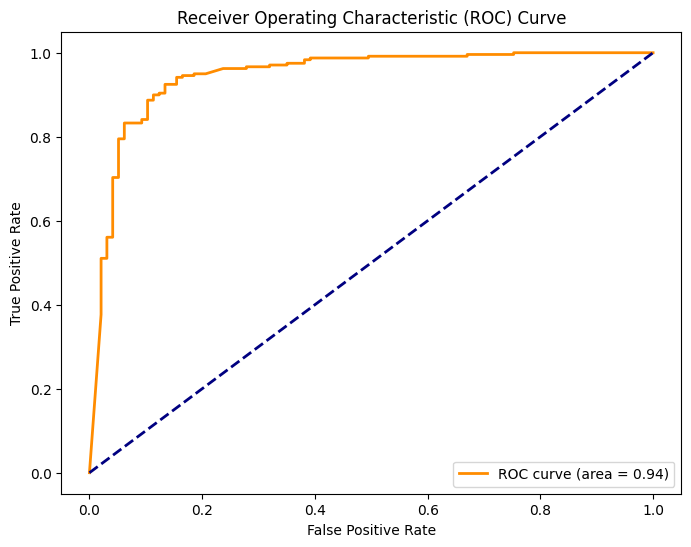

ROC AUC: 0.94


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get true labels and predicted probabilities
y_true = np.array(y_true)
y_pred_prob = []

# Get predicted probabilities for each sample
for images, _ in val_ds:
    predictions = model.predict(images)
    y_pred_prob.extend(predictions.flatten())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"ROC AUC: {roc_auc:.2f}")
